In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t
import pickle

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Tuning: communication network

In [2]:
# Instantiate tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:18: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:104: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


## 1. Grid search: crude (400 parameter combinations)


In [3]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)
seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

# specify parameter space for grid search
i_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
t_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

#t_seq = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 1.1 Run grid search simulations

In [4]:
# Run simulation
result_error, result_child, result_cl, empirical_data = tuning.execute(t_range=t_seq,
                                                                       i_range=i_seq,
                                                                       t=2000,
                                                                       population_name='communication')

# Save model output

file = open('../output/tuning/com_output_error_1.obj', 'wb')
pickle.dump(result_error, file)

file = open('../output/tuning/com_output_child_1.obj', 'wb')
pickle.dump(result_child, file)

file = open('../output/tuning/com_output_cl_1.obj', 'wb')
pickle.dump(result_cl, file)

thres_PA: 0.001 I_PA: 0.001 error: 0.5688541681176467 runtime: 20.794899940490723
thres_PA: 0.001 I_PA: 0.05 error: 12.964933675354255 runtime: 20.286286115646362
thres_PA: 0.001 I_PA: 0.1 error: 1.0454324484268887e+23 runtime: 19.195747137069702
thres_PA: 0.001 I_PA: 0.15 error: 15.902704277211482 runtime: 19.150226831436157
thres_PA: 0.001 I_PA: 0.2 error: 16.302279364308596 runtime: 19.13411521911621
thres_PA: 0.001 I_PA: 0.25 error: 16.606203452287392 runtime: 19.14320206642151
thres_PA: 0.001 I_PA: 0.3 error: 16.75365083053622 runtime: 19.124318838119507
thres_PA: 0.001 I_PA: 0.35 error: 16.861773259168594 runtime: 19.168292999267578
thres_PA: 0.001 I_PA: 0.4 error: 17.033171479060467 runtime: 19.07141089439392
thres_PA: 0.001 I_PA: 0.45 error: 5.812373163374751e+46 runtime: 19.333112955093384
thres_PA: 0.001 I_PA: 0.5 error: 17.16699473177674 runtime: 19.29337787628174
thres_PA: 0.001 I_PA: 0.55 error: 2.778978353823862e+16 runtime: 19.055763959884644
thres_PA: 0.001 I_PA: 0.6 er

### 1.2 Sum of Squared Errors

Text(0.5, 105.0, 'I PA')

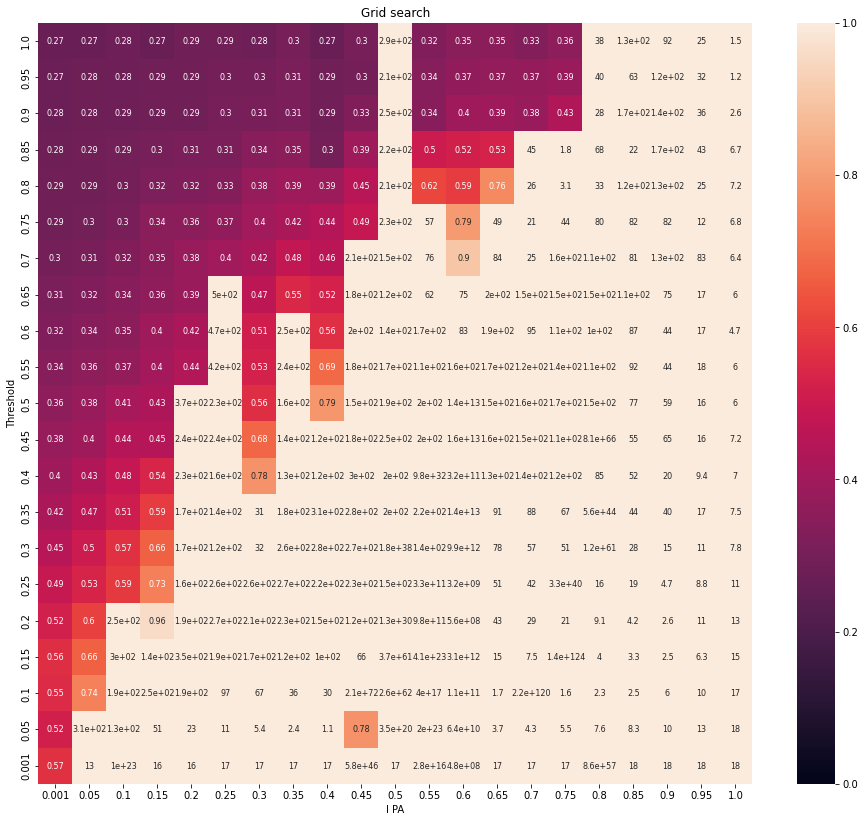

In [6]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)

# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [7]:
plt.savefig('../output/tuning/grid_search1_error_communication.eps', bbox_inches='tight', format='eps', dpi=1000)



<Figure size 432x288 with 0 Axes>

### 1.3 Proportion participants changing PAL

In [8]:
# Checking proportion of participants changing PAL

proplist = []

for dat in result_child:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)

result_prop = pd.DataFrame(result_error)

result_prop["prop"] = prop

prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")


Text(0.5, 105.0, 'I PA')

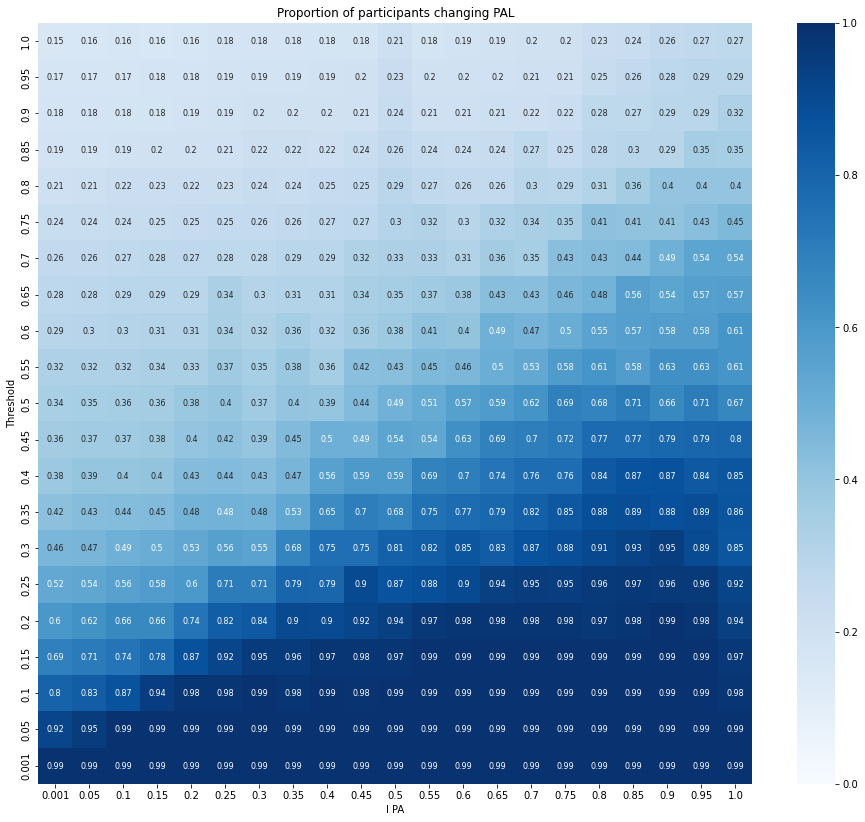

In [9]:
# plot heatmap of proportion changing PAL
plt.figure(figsize=((16,14)))
plt.title('Proportion of participants changing PAL')
sns.heatmap(prop_df, cmap="Blues", annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')



In [10]:
# Save plot
plt.savefig('../output/tuning/grid_search1_proportion_communication.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 2. Grid search: subspace (2000 parameter combinations)

In [21]:
# specify parameter space for grid search
#t_seq = np.arange(0.025,1.025,0.025)
#i_seq = np.arange(0.001,0.051,0.001)

#i_seq1 = np.array([0.001])
#i_seq2 = np.arange(0.005,0.505,0.005)
#i_seq = np.concatenate((i_seq1, i_seq2))

#t_seq = np.arange(0.01,0.31,0.01)
#i_seq = np.arange(0.001,0.051,0.001)

t_seq = np.arange(0.0025,0.101,0.0025)
i_seq = np.arange(0.0025,0.051,0.0025)

### 2.1 Run grid search simulations

In [22]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute(t_range=t_seq,
                                                                           i_range=i_seq,
                                                                           t=2000,
                                                                           population_name='communication')

# Save model output to object
file = open('../output/tuning/com_output_error_2.obj', 'wb')
pickle.dump(result_error2, file)

file = open('../output/tuning/com_output_child_2.obj', 'wb')
pickle.dump(result_child2, file)

file = open('../output/tuning/com_output_cl_2.obj', 'wb')
pickle.dump(result_cl2, file)

thres_PA: 0.0025 I_PA: 0.0025 error: 14.532269531906286 runtime: 19.62164282798767
thres_PA: 0.0025 I_PA: 0.005 error: 63.3035851851701 runtime: 19.448585033416748
thres_PA: 0.0025 I_PA: 0.0075 error: 25.762179532987478 runtime: 19.51472806930542
thres_PA: 0.0025 I_PA: 0.01 error: 9.456702885510417 runtime: 19.955393075942993
thres_PA: 0.0025 I_PA: 0.0125 error: 2.8087413489670414 runtime: 19.462640285491943
thres_PA: 0.0025 I_PA: 0.015000000000000001 error: 1.0905436660956835 runtime: 19.506720066070557
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 0.7372969802793682 runtime: 20.000825881958008
thres_PA: 0.0025 I_PA: 0.02 error: 0.9561362643891217 runtime: 19.707100868225098
thres_PA: 0.0025 I_PA: 0.0225 error: 1.5192122509734285 runtime: 19.666856050491333
thres_PA: 0.0025 I_PA: 0.024999999999999998 error: 2.011519756636614 runtime: 19.78729009628296
thres_PA: 0.0025 I_PA: 0.0275 error: 2.8063084812990486 runtime: 19.65093183517456
thres_PA: 0.0025 I_PA: 0.03 error: 3.5511453236

### 2.2 Results

In [23]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,14.532270,63.303585,25.762180,9.456703,2.808741,1.090544,0.737297,0.956136,1.519212,2.011520,2.806308,3.551145,4.160157,4.752736,5.456184,6.024765,6.547791,6.924363,7.476753,7.598585
0.0050,0.389370,0.363408,129.912417,84.836143,50.274762,29.457595,15.917047,11.552038,6.379981,3.055125,1.974479,1.661413,1.430039,1.239818,1.276883,1.546339,1.544755,1.638818,2.095356,2.267559
0.0075,0.383596,0.410030,25.789456,130.553725,94.479118,89.243776,60.855750,43.684059,30.593565,18.340074,15.378762,11.661896,7.884083,5.873970,3.499758,3.100947,2.930551,1.359133,1.425944,1.527611
0.0100,0.413637,0.437540,0.475984,58.161475,46.063631,108.535689,115.154160,86.138934,62.622341,50.559161,39.425711,31.832772,21.842783,19.759591,14.984717,9.479323,9.776866,9.205724,6.035535,4.788629
0.0125,0.475005,0.517765,0.555392,0.577667,30.371257,126.027604,81.827329,119.137403,110.272862,74.837646,73.406702,62.450018,49.606818,39.604507,29.048919,30.681089,24.815205,20.380136,16.664022,11.090384
0.0150,0.519452,0.548859,0.621137,0.652697,0.846133,115.624215,108.666466,160.542566,128.951388,110.777450,116.999858,101.790985,71.203223,63.473172,56.395686,43.171268,43.515577,29.971731,27.047749,24.228316
0.0175,0.530807,0.550409,0.597781,0.677923,0.753510,110.396798,118.765983,217.699828,137.089128,129.486697,137.767307,130.907134,97.612731,82.588135,82.174398,56.307834,65.066327,48.045729,47.298831,47.625107
0.0200,0.527845,0.553368,0.564791,0.665000,0.741889,136.179096,57.508927,240.043605,99.025892,164.387883,137.756199,156.059596,130.336074,113.333166,111.195424,72.867258,100.114317,71.029170,59.336024,58.357070
0.0225,0.533890,0.541456,0.588782,0.632982,0.673702,0.692646,83.294401,146.391169,23.608082,180.605970,162.475146,165.472668,154.509598,142.696236,135.602220,106.460842,111.325134,99.568937,93.718792,90.053726


Text(0.5, 105.0, 'I PA')

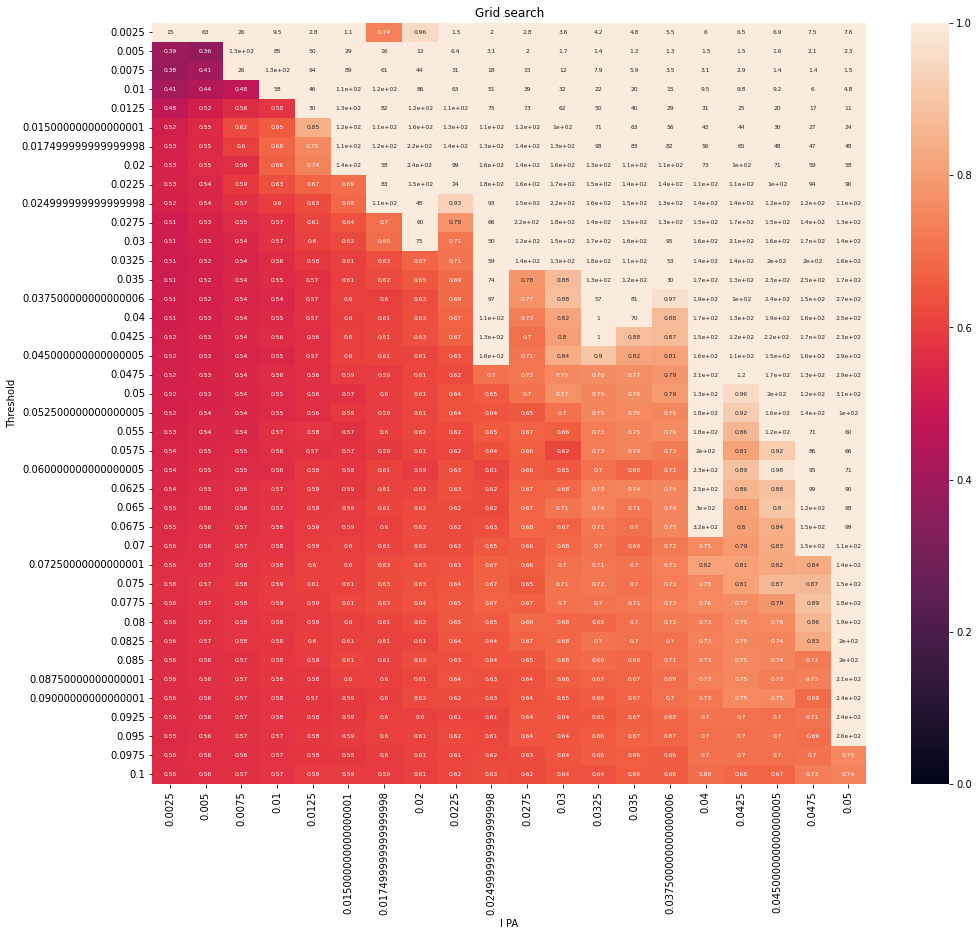

In [24]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [25]:
plt.savefig('../output/tuning/grid_search2_communication.eps', bbox_inches='tight', format='eps', dpi=1000)

<Figure size 432x288 with 0 Axes>

### 2.3 Select best fitting parameter combinations

In [26]:
sort_errors = result_error2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(0.005, 0.005, 0.36340828715512286),
 (0.0075, 0.0025, 0.383595571530552),
 (0.005, 0.0025, 0.38937008166772025),
 (0.0075, 0.005, 0.4100299772524564),
 (0.01, 0.0025, 0.41363704254327843),
 (0.01, 0.005, 0.43754023498303285),
 (0.0125, 0.0025, 0.47500541513893924),
 (0.01, 0.0075, 0.47598437626369305),
 (0.0325, 0.0025, 0.5058217508710278),
 (0.035, 0.0025, 0.5071358881596071),
 (0.03, 0.0025, 0.5109300270916207),
 (0.0275, 0.0025, 0.5117170663192006),
 (0.037500000000000006, 0.0025, 0.5132661018741599),
 (0.04, 0.0025, 0.5132677776952381),
 (0.0425, 0.0025, 0.5169579041486031),
 (0.0125, 0.005, 0.51776491062812),
 (0.015000000000000001, 0.0025, 0.519451526403719),
 (0.045000000000000005, 0.0025, 0.5201658822617669),
 (0.0325, 0.005, 0.5203894989680119),
 (0.0475, 0.0025, 0.5218652499126263),
 (0.037500000000000006, 0.005, 0.522955543626106),
 (0.024999999999999998, 0.0025, 0.5236105242339),
 (0.035, 0.005, 0.523890422716435),
 (0.05, 0.0025, 0.5239187730012247),
 (0.0525000000000000

In [27]:
# Save parameter combinations in csv

with open('../output/opt_pars_communication.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)



In [4]:

# Read parameter combinations selected.
file = open('../output/tuning/com_output_error_2.obj', 'rb')
com_error2 = pickle.load(file)

opt_pars = tuple(com_error2)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(0.04, 0.001, 0.3453966900585863),
 (0.03, 0.001, 0.34714655522683163),
 (0.05, 0.001, 0.3510302029914348),
 (0.01, 0.001, 0.3548701344969995),
 (0.060000000000000005, 0.001, 0.36340949013347273),
 (0.06999999999999999, 0.001, 0.372194697534861),
 (0.02, 0.001, 0.3725067021890811),
 (0.08, 0.001, 0.38029701022784224),
 (0.3, 0.001, 0.3818211399149777),
 (0.29000000000000004, 0.001, 0.3847029847419476),
 (0.09, 0.001, 0.38502382264192914),
 (0.28, 0.001, 0.38812604607659923),
 (0.09999999999999999, 0.001, 0.3913500166831001),
 (0.27, 0.001, 0.39135089696236514),
 (0.26, 0.001, 0.3952415359114839),
 (0.25, 0.001, 0.398204063086003),
 (0.11, 0.001, 0.39871144644328305),
 (0.24000000000000002, 0.001, 0.3998276279700595),
 (0.23, 0.001, 0.40156039194568194),
 (0.22, 0.001, 0.402542129085218),
 (0.21000000000000002, 0.001, 0.4035741980817771),
 (0.12, 0.001, 0.4038334604567668),
 (0.2, 0.001, 0.40484705119078523),
 (0.19, 0.001, 0.40662634199608766),
 (0.13, 0.001, 0.40801817035890414),
 (0

In [28]:
# Run with optimal params

result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='communication')

# Save model output to object
file = open('../output/tuning/com_output_error_3.obj', 'wb')
pickle.dump(result_error3, file)

file = open('../output/tuning/com_output_child_3.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/com_output_cl_3.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.005 I_PA: 0.005 error: 0.36340828715512286 runtime: 19.836572885513306
thres_PA: 0.0075 I_PA: 0.0025 error: 0.383595571530552 runtime: 19.38684606552124
thres_PA: 0.005 I_PA: 0.0025 error: 0.38937008166772025 runtime: 19.261831283569336
thres_PA: 0.0075 I_PA: 0.005 error: 0.4100299772524564 runtime: 19.34843611717224
thres_PA: 0.01 I_PA: 0.0025 error: 0.41363704254327843 runtime: 19.34246301651001
thres_PA: 0.01 I_PA: 0.005 error: 0.43754023498303285 runtime: 19.237372159957886
thres_PA: 0.0125 I_PA: 0.0025 error: 0.47500541513893924 runtime: 19.352728128433228
thres_PA: 0.01 I_PA: 0.0075 error: 0.47598437626369305 runtime: 19.246397733688354
thres_PA: 0.0325 I_PA: 0.0025 error: 0.5058217508710278 runtime: 19.269871950149536
thres_PA: 0.035 I_PA: 0.0025 error: 0.5071358881596071 runtime: 19.30180287361145
thres_PA: 0.03 I_PA: 0.0025 error: 0.5109300270916207 runtime: 19.2363440990448
thres_PA: 0.0275 I_PA: 0.0025 error: 0.5117170663192006 runtime: 19.289259910583496
thres_P

# Visualization of runs for checking


thres_PA: 0.0025 I_PA: 0.0025 error: 14.532269531906286 runtime: 18.122848987579346
thres_PA: 0.0025 I_PA: 0.02 error: 0.9561362643891217 runtime: 20.66537380218506
thres_PA: 0.0025 I_PA: 0.0225 error: 1.5192122509734285 runtime: 21.870496034622192


<AxesSubplot:>

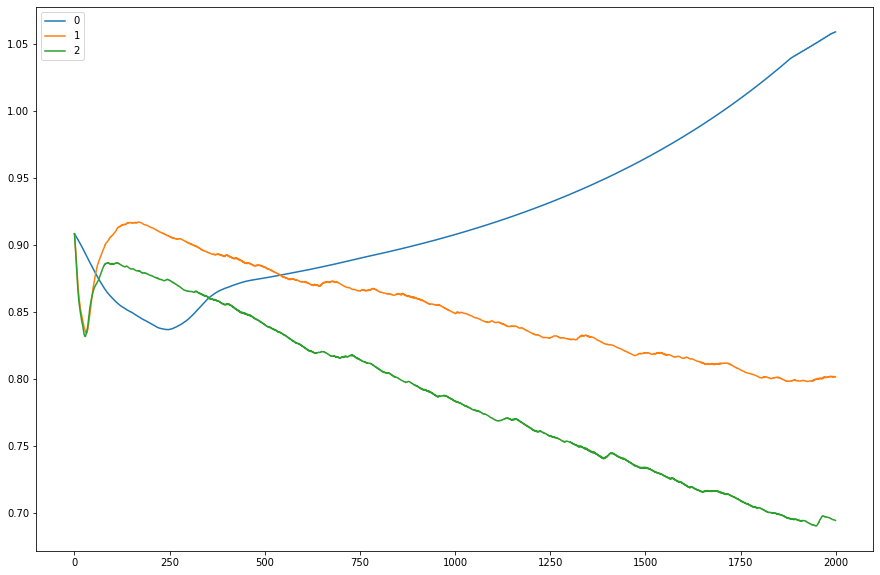

In [18]:

opt_pars = []
opt_pars.append((0.0025, 0.0025))
opt_pars.append((0.0025, 0.02))
opt_pars.append((0.0025, 0.0225))
result_error3, result_child3, result_cl3, empirical_data3 = tuning.executeSet(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='communication')
by_run_com = []
for run in range(len(opt_pars)):
    by_run_com.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_com, axis=1)

avg_nom.plot(figsize=((15, 10)))